## Edgar Moises Hernandez-Gonzalez
### 07/11/19
### Clasificar CIFAR10 con CNN
#### class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [0]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs = 20,
                    batch_size=32, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 161us/sample - loss: 1.5350 - acc: 0.4386 - val_loss: 1.2190 - val_acc: 0.5616
Epoch 2/20
50000/50000 [==============================] - 6s 126us/sample - loss: 1.1628 - acc: 0.5865 - val_loss: 1.0813 - val_acc: 0.6128
Epoch 3/20
50000/50000 [==============================] - 6s 125us/sample - loss: 1.0222 - acc: 0.6396 - val_loss: 0.9555 - val_acc: 0.6618
Epoch 4/20
50000/50000 [==============================] - 6s 124us/sample - loss: 0.9264 - acc: 0.6733 - val_loss: 0.9020 - val_acc: 0.6844
Epoch 5/20
50000/50000 [==============================] - 6s 125us/sample - loss: 0.8610 - acc: 0.6969 - val_loss: 0.8657 - val_acc: 0.7003
Epoch 6/20
50000/50000 [==============================] - 6s 126us/sample - loss: 0.8041 - acc: 0.7185 - val_loss: 0.8896 - val_acc: 0.6943
Epoch 7/20
50000/50000 [==============================] - 6s 125us/sample - loss: 0.7609 - acc: 0.7296 - val_l

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 63us/sample - loss: 1.0324 - acc: 0.7200
Test loss: 1.0324161005020143
Test accuracy: 0.72


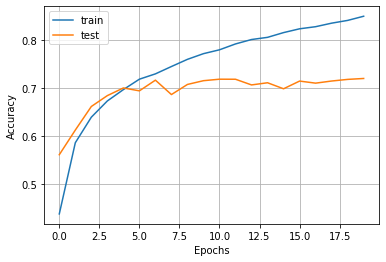

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

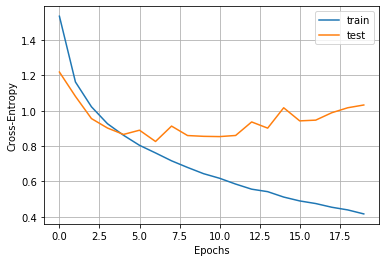

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [14]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[725  19  73  30  20   9  11  13  64  36]
 [ 16 833   9   7   4  12  13   3  20  83]
 [ 44   2 602  70  86  82  66  28  11   9]
 [ 16   8  60 522  69 197  60  38  16  14]
 [ 12   0  61  61 681  45  56  69  12   3]
 [  9   3  37 185  41 641  23  49   5   7]
 [  5   0  26  58  26  26 845   5   6   3]
 [ 13   2  36  58  67  66   9 730   4  15]
 [ 76  44  17  17   2   7   7   6 802  22]
 [ 26  77   9  11   6   5   8  17  22 819]]


In [15]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.77      0.72      0.75      1000
           1       0.84      0.83      0.84      1000
           2       0.65      0.60      0.62      1000
           3       0.51      0.52      0.52      1000
           4       0.68      0.68      0.68      1000
           5       0.59      0.64      0.61      1000
           6       0.77      0.84      0.81      1000
           7       0.76      0.73      0.75      1000
           8       0.83      0.80      0.82      1000
           9       0.81      0.82      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [16]:
num_test = 5
print("Etiqueta verdadera", y_test[num_test])
prediccion = model.predict(x_test[num_test].reshape(1,32,32,3))
print("Etiqueta predicha", prediccion.argmax())

Etiqueta verdadera [6]
Etiqueta predicha 6


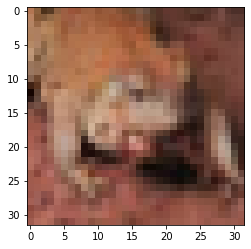

In [17]:
plt.imshow(x_test[num_test])
plt.show()